In [30]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input,Embedding,Flatten
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling1D, MaxPooling2D

from tensorflow.keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model, load_model


from tensorflow.keras.utils import to_categorical

In [31]:
# Core Library modules
import os
import random as rn
import tensorflow

# fix random seed for reproducibility
numpy.random.seed(0)
os.environ["PYTHONHASHSEED"] = "0"
os.environ["TF_CUDNN_USE_AUTOTUNE"] = "0"
rn.seed(0)
tensorflow.random.set_seed(0)


In [32]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        #b = dataset[i:(i+look_back), 1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #n=round((i / 6) % 24)
        #n=((i) / 6) % 24
        #n=n/24
        #dataY.append(n)
    return numpy.array(dataX), numpy.array(dataY)

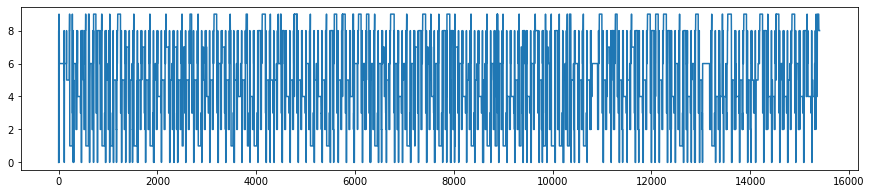

In [33]:
Pdataset = pandas.read_csv('mrecout.csv', usecols=[1], engine='python', skipfooter=3)
plt.figure(figsize=(15,3))
plt.plot(Pdataset)
plt.show()

In [75]:
Pdataset.tail(14)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)


In [76]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

10320 5084


In [77]:
# reshape into X=t and Y=t+1
look_back = 256
n_classes=10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(10063, 256)

In [78]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 4, 64,1))
testX = numpy.reshape(testX, (testX.shape[0], 4,64,1 ))
trainX.shape

(10063, 4, 64, 1)

In [84]:
inut = Input(shape=(4,64,1), name="input")
act="relu"
#h = Dense(200, activation=act, name="encoder_1" )(inut)
#h = Dense(200, activation=act, name="encoder_2" )(h)
#h = Dense(500, activation=act, name="encoder_3" )(h)
#h3= Dense(n_classes, activation="softmax", name="encoder_Last" )(h)
#conv0= Conv2D(32, 5, strides=(1,2), padding='same', activation='relu', name='conv0')(inut)
#conv1= Conv2D(32, 5, strides=(2,4), padding='same', activation='relu', name='conv1')
#conv2= Conv2D(32, 3, strides=2, padding=pad3, activation='relu', name='conv2')
#model = Model(inputs=inut, outputs=h3) 

In [85]:
      
  #model.add(Conv1D(64, 3, activation='relu', input_shape=(2,seq_length)))

y = Conv2D(filters=32,
                             kernel_size=5,
                             padding='same',
                             strides=(1,2),
                             activation='relu')(inut)
y = MaxPooling2D(pool_size=(2, 2),
                                   strides=(1, 2),
                                   padding='same')(y)
y = Conv2D(filters=32,
                             kernel_size=5,
                             
                             padding='same',
                             activation='relu')(y)
y = MaxPooling2D(pool_size=(2, 2),
                                   strides=(1, 2),
                                   padding='same')(y)
y = Flatten()(y)
y = Dense(1024, activation='relu')(y)
y = Dropout(0.4)(y)

h4 = Dense(10, activation='softmax')(y)
model = Model(inputs=inut, outputs=h4)   
trainY.shape  

(10063,)

In [86]:
"""
seq_length = look_back

model = Sequential()
model.add(Conv1D(128, 1, activation='relu', input_shape=(1,seq_length)))
model.add(Conv1D(256, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(128, 1, activation='relu'))
model.add(Conv1D(128, 1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))
"""


"\nseq_length = look_back\n\nmodel = Sequential()\nmodel.add(Conv1D(128, 1, activation='relu', input_shape=(1,seq_length)))\nmodel.add(Conv1D(256, 1, activation='relu'))\nmodel.add(MaxPooling1D(1))\nmodel.add(Conv1D(128, 1, activation='relu'))\nmodel.add(Conv1D(128, 1, activation='relu'))\nmodel.add(GlobalAveragePooling1D())\nmodel.add(Dropout(0.5))\nmodel.add(Dense(n_classes, activation='sigmoid'))\n"

In [94]:

trainYO = to_categorical(trainY, num_classes=n_classes)
testYO = to_categorical(testY, num_classes=n_classes)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 4, 64, 1)]        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 32, 32)         832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 16, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 16, 32)         25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049

In [88]:
model.fit(trainX, trainYO, batch_size=512, epochs=100 )


Train on 10063 samples
Epoch 1/100
10063/10063 [==============================] - 1s 54us/sample - loss: 0.0942 - accuracy: 0.9778
Epoch 2/100
10063/10063 [==============================] - 0s 31us/sample - loss: 0.0530 - accuracy: 0.9833
Epoch 3/100
10063/10063 [==============================] - 0s 39us/sample - loss: 0.0397 - accuracy: 0.9852
Epoch 4/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0345 - accuracy: 0.9862
Epoch 5/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0300 - accuracy: 0.9875
Epoch 6/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0253 - accuracy: 0.9903
Epoch 7/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0211 - accuracy: 0.9916
Epoch 8/100
10063/10063 [==============================] - 0s 41us/sample - loss: 0.0202 - accuracy: 0.9920
Epoch 9/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0169 - accuracy: 0.9934
Epoch

10063/10063 [==============================] - 0s 40us/sample - loss: 2.5823e-05 - accuracy: 1.0000
Epoch 76/100
10063/10063 [==============================] - 0s 40us/sample - loss: 7.9760e-06 - accuracy: 1.0000
Epoch 77/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0049 - accuracy: 0.9989
Epoch 78/100
10063/10063 [==============================] - 0s 37us/sample - loss: 7.7013e-05 - accuracy: 1.0000
Epoch 79/100
10063/10063 [==============================] - 0s 35us/sample - loss: 1.7139e-05 - accuracy: 1.0000
Epoch 80/100
10063/10063 [==============================] - 0s 40us/sample - loss: 9.2978e-06 - accuracy: 1.0000
Epoch 81/100
10063/10063 [==============================] - 0s 40us/sample - loss: 0.0021 - accuracy: 0.9994
Epoch 82/100
10063/10063 [==============================] - 0s 41us/sample - loss: 6.8844e-05 - accuracy: 1.0000
Epoch 83/100
10063/10063 [==============================] - 0s 40us/sample - loss: 1.1828e-05 - accuracy: 1.0000
Epoc

In [89]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


10063/10063 [==============================] - 1s 129us/sample - loss: 3.0919e-05 - accuracy: 1.0000
Test loss: 3.091924826613662e-05
Test accuracy: 1.0


In [90]:
import datetime
sName="convDenserecout"
with open('score','a') as f:
            f.write("%s \t %s test score loss %s  accuracy %s\n" %
                 (sName, datetime.datetime.now(),score[0], score[1]))
   

In [91]:
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
trainPredict1

array([[1.0000000e+00, 5.4646877e-15, 7.1785730e-21, ..., 7.5621530e-21,
        5.8553163e-21, 1.3544915e-20],
       [1.0000000e+00, 1.1886449e-14, 2.1853453e-20, ..., 2.3719981e-20,
        1.8077798e-20, 4.0634957e-20],
       [1.0000000e+00, 6.3257213e-14, 1.4986450e-20, ..., 1.6179323e-20,
        1.3112865e-20, 2.7249194e-20],
       ...,
       [1.0000000e+00, 7.7943107e-38, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4210097e-38, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 6.0500368e-37, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [92]:
score1 = model.evaluate(testX, testYO, verbose=1)
print(score1)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4827/4827 [==============================] - 0s 70us/sample - loss: 0.0548 - accuracy: 0.9938
[0.05484185362495561, 0.99382645]
Test loss: 0.05484185362495561
Test accuracy: 0.99382645


In [93]:
with open('score','a') as f:
            f.write("%s \t %s evaluate score loss %s  accuracy %s\n" %
                 (sName, datetime.datetime.now(),score1[0], score1[1]))
